In [1]:
import hover
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from bokeh.plotting import figure,show,output_file
from bokeh.models import ColumnDataSource,HoverTool

In [3]:
#1.加载数据

In [4]:


import os
os.chdir(r'G:\python\03python数据分析与挖掘实战\03数据分析项目实战\01城市餐饮店铺选址项目')
df1=pd.read_excel('上海餐饮数据.xlsx')
print(df1)
print('finished!')

       类别    行政区  点评数   口味   环境   服务  人均消费   城市         Lng        Lat
0      烧烤   浦东新区  176  8.0  8.6  7.9   124  上海市  121.967860  30.884477
1      美食    闵行区    2  6.1  6.5  6.3     0  上海市  121.967781  30.883818
2      粤菜   浦东新区  141  6.7  7.2  6.6   141  上海市  121.933142  30.893224
3      海鲜   浦东新区   76  7.2  7.2  7.3   148  上海市  121.926062  30.899868
4      烧烤   浦东新区  600  7.2  7.6  7.0   143  上海市  121.925877  30.901100
...    ..    ...  ...  ...  ...  ...   ...  ...         ...        ...
96393  快餐    黄浦区   14  7.1  7.2  7.3     0  上海市  109.556522  18.242452
96394  美食    嘉定区    2  7.3  7.4  7.4     0  上海市  107.557465  30.613898
96395  料理    闵行区   43  7.2  7.1  7.0    25  上海市  107.371337  24.510765
96396  甜点    普陀区    0  0.0  0.0  0.0     0  上海市  107.064797  29.831243
96397  美食    虹口区    0  0.0  0.0  0.0     0  上海市  106.175198  37.997707

[96398 rows x 10 columns]
finished!


<Axes: >

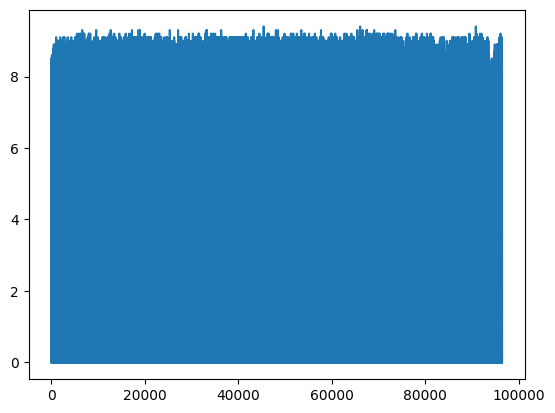

In [5]:
df1['口味'].plot()

In [6]:
len(df1)

96398

In [7]:
columns_lst=df1.columns.tolist()
print(df1)
#columns_lst = df1.columns.tolist() 这行代码的作用是将 DataFrame（df1）的列名转换为一个列表，并赋值给变量 columns_lst。以下是详细解释：

       类别    行政区  点评数   口味   环境   服务  人均消费   城市         Lng        Lat
0      烧烤   浦东新区  176  8.0  8.6  7.9   124  上海市  121.967860  30.884477
1      美食    闵行区    2  6.1  6.5  6.3     0  上海市  121.967781  30.883818
2      粤菜   浦东新区  141  6.7  7.2  6.6   141  上海市  121.933142  30.893224
3      海鲜   浦东新区   76  7.2  7.2  7.3   148  上海市  121.926062  30.899868
4      烧烤   浦东新区  600  7.2  7.6  7.0   143  上海市  121.925877  30.901100
...    ..    ...  ...  ...  ...  ...   ...  ...         ...        ...
96393  快餐    黄浦区   14  7.1  7.2  7.3     0  上海市  109.556522  18.242452
96394  美食    嘉定区    2  7.3  7.4  7.4     0  上海市  107.557465  30.613898
96395  料理    闵行区   43  7.2  7.1  7.0    25  上海市  107.371337  24.510765
96396  甜点    普陀区    0  0.0  0.0  0.0     0  上海市  107.064797  29.831243
96397  美食    虹口区    0  0.0  0.0  0.0     0  上海市  106.175198  37.997707

[96398 rows x 10 columns]


In [8]:
data1=df1[['类别','口味','环境','服务','人均消费']]
print(data1)

       类别   口味   环境   服务  人均消费
0      烧烤  8.0  8.6  7.9   124
1      美食  6.1  6.5  6.3     0
2      粤菜  6.7  7.2  6.6   141
3      海鲜  7.2  7.2  7.3   148
4      烧烤  7.2  7.6  7.0   143
...    ..  ...  ...  ...   ...
96393  快餐  7.1  7.2  7.3     0
96394  美食  7.3  7.4  7.4     0
96395  料理  7.2  7.1  7.0    25
96396  甜点  0.0  0.0  0.0     0
96397  美食  0.0  0.0  0.0     0

[96398 rows x 5 columns]


In [9]:
data1.dropna(inplace=True)
#空值的处理原来是print(data1)
#现在是[96258 rows x 5 columns]少了一百条
print(data1)

       类别   口味   环境   服务  人均消费
0      烧烤  8.0  8.6  7.9   124
1      美食  6.1  6.5  6.3     0
2      粤菜  6.7  7.2  6.6   141
3      海鲜  7.2  7.2  7.3   148
4      烧烤  7.2  7.6  7.0   143
...    ..  ...  ...  ...   ...
96393  快餐  7.1  7.2  7.3     0
96394  美食  7.3  7.4  7.4     0
96395  料理  7.2  7.1  7.0    25
96396  甜点  0.0  0.0  0.0     0
96397  美食  0.0  0.0  0.0     0

[96258 rows x 5 columns]


In [10]:
data1 = data1[(data1['口味'] > 0) & (data1['人均消费'] > 0)]
print(data1)
#上面那个数据人均消费有的为0，只是这个类别没有人点，所以要去除掉
#用口味>0是因为一个为0，后面都是为0，所以选择一个就可以了
#因此少了1万条数据

       类别   口味   环境   服务  人均消费
0      烧烤  8.0  8.6  7.9   124
2      粤菜  6.7  7.2  6.6   141
3      海鲜  7.2  7.2  7.3   148
4      烧烤  7.2  7.6  7.0   143
5      本菜  8.2  8.9  8.4    66
...    ..  ...  ...  ...   ...
96382  浙菜  7.7  7.0  7.4    76
96386  浙菜  7.5  7.0  7.2    58
96387  亚菜  7.0  7.1  7.1    49
96388  甜点  8.2  7.9  8.1    33
96395  料理  7.2  7.1  7.0    25

[54889 rows x 5 columns]


In [11]:
data1['性价比']=(data1['口味']+data1['环境']+data1['服务']/data1['人均消费'])
print(data1)

       类别   口味   环境   服务  人均消费        性价比
0      烧烤  8.0  8.6  7.9   124  16.663710
2      粤菜  6.7  7.2  6.6   141  13.946809
3      海鲜  7.2  7.2  7.3   148  14.449324
4      烧烤  7.2  7.6  7.0   143  14.848951
5      本菜  8.2  8.9  8.4    66  17.227273
...    ..  ...  ...  ...   ...        ...
96382  浙菜  7.7  7.0  7.4    76  14.797368
96386  浙菜  7.5  7.0  7.2    58  14.624138
96387  亚菜  7.0  7.1  7.1    49  14.244898
96388  甜点  8.2  7.9  8.1    33  16.345455
96395  料理  7.2  7.1  7.0    25  14.580000

[54889 rows x 6 columns]


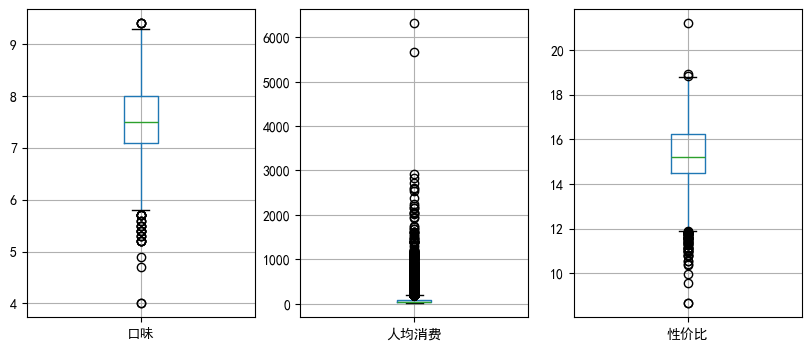

In [12]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体
plt.rcParams['font.family'] = 'sans-serif'    # 通用字体族
def f1():
    fig,axes=plt.subplots(1,3,figsize=(10,4))
    data1.boxplot(column='口味',ax=axes[0])
    data1.boxplot(column='人均消费',ax=axes[1])
    data1.boxplot(column='性价比',ax=axes[2])
f1()
#1,3=一行三个图

In [13]:
#除去异常值
def f2(data,col):
   q1=data[col].quantile(q=0.25)
   q3=data[col].quantile(q=0.75)
   iqr=q3-q1
   t1=q1-3*iqr
   t2=q3+3*iqr
   return data[(data[col] > t1) & (data[col] < t2)][['类别', col]]

In [14]:
data_kw=f2(data1,'口味')
data_kw

,类别,口味
0,烧烤,8.0
2,粤菜,6.7
3,海鲜,7.2
4,烧烤,7.2
5,本菜,8.2
...,...,...
96382,浙菜,7.7
96386,浙菜,7.5
96387,亚菜,7.0
96388,甜点,8.2


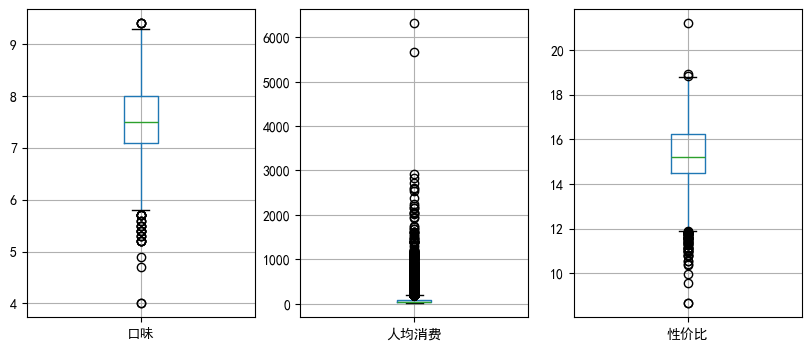

In [15]:
f1()

In [16]:
data_rj = f2(data1, '人均消费' )
data_rj

,类别,人均消费
0,烧烤,124
2,粤菜,141
3,海鲜,148
4,烧烤,143
5,本菜,66
...,...,...
96382,浙菜,76
96386,浙菜,58
96387,亚菜,49
96388,甜点,33


In [17]:
data_xjb = f2(data1, '性价比')
data_xjb

,类别,性价比
0,烧烤,16.663710
2,粤菜,13.946809
3,海鲜,14.449324
4,烧烤,14.848951
5,本菜,17.227273
...,...,...
96382,浙菜,14.797368
96386,浙菜,14.624138
96387,亚菜,14.244898
96388,甜点,16.345455


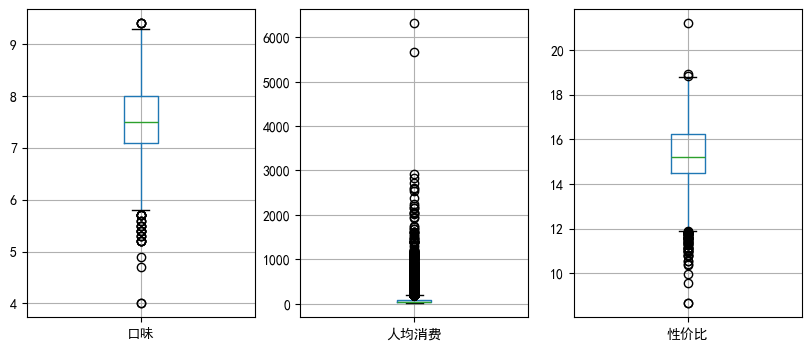

In [18]:
f1()

In [19]:
#标准化指标与排序
def f3(data, col, group_by_column='类别'):
    data_gp = data.groupby(group_by_column).mean()
    col_name = col + 'norm'
    data_gp[col_name] = (data_gp[col] - data_gp[col].min()) / (data_gp[col].max() - data_gp[col].min())
    data_gp.sort_values(by=col_name, inplace=True, ascending=False)
    return data_gp

In [20]:
data_kw_score=f3(data_kw,'口味')

In [21]:
data_rj_score=f3(data_rj,'人均消费')

In [22]:
data_xjb_score=f3(data_xjb,'性价比')

In [23]:
print(data_kw_score)

          口味    口味norm
类别                    
素菜  8.021705  1.000000
南菜  7.984874  0.948128
本菜  7.959824  0.912848
火锅  7.949428  0.898206
亚菜  7.889937  0.814421
蟹宴  7.873469  0.791228
西餐  7.853583  0.763221
疆菜  7.791221  0.675392
州菜  7.772500  0.649026
料理  7.770436  0.646118
海鲜  7.693175  0.537306
粤菜  7.635520  0.456107
啡厅  7.630942  0.449659
湾菜  7.607396  0.416498
烧烤  7.606011  0.414547
西菜  7.541071  0.323088
甜点  7.524346  0.299533
龙虾  7.508283  0.276909
面馆  7.505263  0.272656
浙菜  7.503864  0.270686
午茶  7.500000  0.265244
川菜  7.489197  0.250029
美食  7.469031  0.221627
助餐  7.394745  0.117006
快餐  7.361730  0.070508
湘菜  7.353606  0.059066
北菜  7.350125  0.054164
常菜  7.311667  0.000000


In [24]:
print(data_rj_score)

          人均消费  人均消费norm
类别                      
午茶  150.000000  1.000000
助餐  125.562278  0.802928
蟹宴  123.475248  0.786097
海鲜  113.282158  0.703898
本菜  111.316243  0.688044
火锅   98.524051  0.584884
龙虾   96.593656  0.569317
亚菜   94.426724  0.551842
西餐   93.768841  0.546537
粤菜   91.484435  0.528115
南菜   91.411765  0.527529
浙菜   86.794212  0.490292
料理   75.802834  0.401655
烧烤   73.534963  0.383366
素菜   71.251969  0.364955
州菜   71.125000  0.363931
西菜   67.339286  0.333402
湾菜   64.836310  0.313218
川菜   63.249144  0.300418
美食   61.305644  0.284745
疆菜   59.610687  0.271077
湘菜   58.823276  0.264727
北菜   50.478750  0.197434
常菜   46.258333  0.163400
啡厅   45.053159  0.153681
甜点   30.706620  0.037987
面馆   27.947368  0.015735
快餐   25.996115  0.000000


In [25]:
print(data_xjb_score)

          性价比   性价比norm
类别                     
南菜  16.349142  1.000000
素菜  16.245269  0.935312
午茶  16.151333  0.876812
西餐  16.064819  0.822935
亚菜  16.031866  0.802412
本菜  16.023882  0.797441
火锅  15.866435  0.699388
蟹宴  15.681620  0.584293
州菜  15.642693  0.560050
疆菜  15.639593  0.558120
料理  15.623516  0.548108
啡厅  15.604038  0.535977
粤菜  15.458151  0.445125
湾菜  15.440295  0.434005
甜点  15.404661  0.411813
海鲜  15.296297  0.344328
助餐  15.294203  0.343024
烧烤  15.197260  0.282652
西菜  15.186802  0.276139
美食  15.135392  0.244123
川菜  15.048824  0.190211
浙菜  15.047518  0.189398
面馆  15.029338  0.178076
快餐  14.942965  0.124286
龙虾  14.785400  0.026161
北菜  14.774439  0.019334
湘菜  14.766607  0.014457
常菜  14.743393  0.000000


In [26]:
# 第一次合并（口味 + 人均消费）
data_final_q1 = pd.merge(
    data_kw_score, 
    data_rj_score, 
    left_index=True, # 对应同一家店铺
    right_index=True
    
)

# 第二次合并（结果 + 性价比）
data_final_q1 = pd.merge(
    data_final_q1, 
    data_xjb_score, 
    left_index=True, 
    right_index=True
)

In [27]:

print(data_final_q1)

          口味    口味norm        人均消费  人均消费norm        性价比   性价比norm
类别                                                               
素菜  8.021705  1.000000   71.251969  0.364955  16.245269  0.935312
南菜  7.984874  0.948128   91.411765  0.527529  16.349142  1.000000
本菜  7.959824  0.912848  111.316243  0.688044  16.023882  0.797441
火锅  7.949428  0.898206   98.524051  0.584884  15.866435  0.699388
亚菜  7.889937  0.814421   94.426724  0.551842  16.031866  0.802412
蟹宴  7.873469  0.791228  123.475248  0.786097  15.681620  0.584293
西餐  7.853583  0.763221   93.768841  0.546537  16.064819  0.822935
疆菜  7.791221  0.675392   59.610687  0.271077  15.639593  0.558120
州菜  7.772500  0.649026   71.125000  0.363931  15.642693  0.560050
料理  7.770436  0.646118   75.802834  0.401655  15.623516  0.548108
海鲜  7.693175  0.537306  113.282158  0.703898  15.296297  0.344328
粤菜  7.635520  0.456107   91.484435  0.528115  15.458151  0.445125
啡厅  7.630942  0.449659   45.053159  0.153681  15.604038  0.535977
湾菜  7.6073

In [28]:
data_final_q1['size']=data_final_q1['口味norm']*40

In [29]:
#3.绘制图表辅助分析

In [30]:
print(data_final_q1.columns.tolist())

['口味', '口味norm', '人均消费', '人均消费norm', '性价比', '性价比norm', 'size']


In [31]:
data_final_q1.columns=['kw','kw_norm','price','price_norm','xjb','xjb_norm','size']
#将名改为英文

In [32]:
print(data_final_q1)

          kw   kw_norm       price  price_norm        xjb  xjb_norm       size
类别                                                                            
素菜  8.021705  1.000000   71.251969    0.364955  16.245269  0.935312  40.000000
南菜  7.984874  0.948128   91.411765    0.527529  16.349142  1.000000  37.925100
本菜  7.959824  0.912848  111.316243    0.688044  16.023882  0.797441  36.513934
火锅  7.949428  0.898206   98.524051    0.584884  15.866435  0.699388  35.928242
亚菜  7.889937  0.814421   94.426724    0.551842  16.031866  0.802412  32.576838
蟹宴  7.873469  0.791228  123.475248    0.786097  15.681620  0.584293  31.649130
西餐  7.853583  0.763221   93.768841    0.546537  16.064819  0.822935  30.528840
疆菜  7.791221  0.675392   59.610687    0.271077  15.639593  0.558120  27.015692
州菜  7.772500  0.649026   71.125000    0.363931  15.642693  0.560050  25.961024
料理  7.770436  0.646118   75.802834    0.401655  15.623516  0.548108  25.844738
海鲜  7.693175  0.537306  113.282158    0.703898  15.2

In [33]:
print(data_final_q1.columns.tolist())

['kw', 'kw_norm', 'price', 'price_norm', 'xjb', 'xjb_norm', 'size']


In [34]:
#绘制图表辅助分析

In [56]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.layouts import column
from bokeh.models import HoverTool
from bokeh.models.annotations import BoxAnnotation

# 输出文件设置
output_file("project07_h1.html")

# 确保 data_final_q1 是一个有效的 DataFrame
source = ColumnDataSource(data=data_final_q1)  # 确保 data_final_q1 已定义

# 修复 1: 统一变量名 hover (原为 hower)
hover = HoverTool(  # 将变量名从 hower 改为 hover
    tooltips=[
        ('餐饮类型', '@类别'),
        ('人均消费', '@price'),
        ('性价比得分', '@xjb_norm'),
        ('口味得分', '@kw_norm')
    ]
)

data_type = data_final_q1.index.tolist()

# 创建第一个图表：餐饮类型得分（散点图）
result = figure(
    width=800,
    height=300,
    title='餐饮类型得分',
    x_axis_label='人均消费',
    y_axis_label='性价比得分',
    tools=[hover, 'box_select,reset,xwheel_zoom,pan,crosshair']  # 修复 2: 添加 hover 工具
)
result.circle(
    x='price',
    y='xjb_norm',
    source=source,
    line_color='black',
    fill_alpha=0.6,
    size='size'
)
price_mid = BoxAnnotation(left=40, right=80, fill_alpha=0.1, fill_color='navy') 
result.add_layout(price_mid)

# 修复 3: 使用统一的 source 和正确的工具名
kw = figure(
    width=800,
    height=300,
    title='口味得分',
    x_range=data_type,
    tools=[hover, 'box_select,reset,xwheel_zoom,pan,crosshair']  # 使用已定义的 hover
)
kw.vbar(
    x='类别',
    top='kw_norm',
    source=source,
    width=0.8,
    alpha=0.7,
    color='red',
    bottom=0
)

price = figure(
    width=800,
    height=300,
    title='人均消费得分',
    x_range=data_type,
    tools=[hover, 'box_select,reset,xwheel_zoom,pan,crosshair']  # 使用已定义的 hover
)
price.vbar(
    x='类别',
    top='price_norm',  # 确保数据中存在 price_norm 列
    source=source,
    width=0.8,
    alpha=0.7,
    color='green'
)

# 修复 4: 使用 column 布局更直观
p = column(result, kw, price)
show(p)